Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


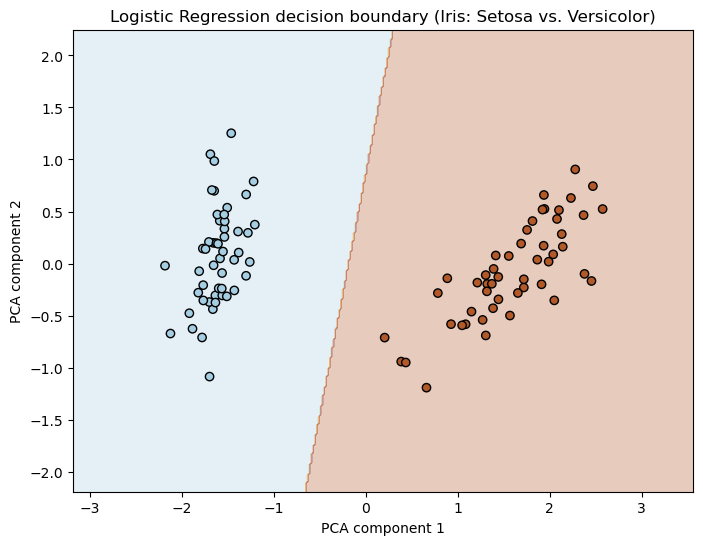

In [1]:
# 1. Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

# 2. Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 3. (Binary case) Use only class 0 and 1 for binary classification (Setosa vs Versicolor)
mask = y < 2
X_binary = X[mask]
y_binary = y[mask]

# 4. Optionally reduce to 2D (for plotting) with PCA
pca = PCA(n_components=2)
X_bin_2d = pca.fit_transform(X_binary)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_bin_2d, y_binary, test_size=0.3, random_state=42
)

# 6. Logistic Regression Model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# 7. Predict and metrics
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 8. Decision boundary visualization
# Create grid to evaluate model
h = .02  # step size in the mesh
x_min, x_max = X_bin_2d[:, 0].min() - 1, X_bin_2d[:, 0].max() + 1
y_min, y_max = X_bin_2d[:, 1].min() - 1, X_bin_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_bin_2d[:, 0], X_bin_2d[:, 1], c=y_binary, edgecolors='k', cmap=plt.cm.Paired)
plt.title("Logistic Regression decision boundary (Iris: Setosa vs. Versicolor)")
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()
